In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m spacy download en_core_web_lg

2023-12-06 18:22:29.092596: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 18:22:29.092679: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 18:22:29.092738: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 18:22:29.108050: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 18:22:33.010883: W tensorflow/compiler/

In [ ]:
!tar -xzvf './drive/MyDrive/CORD19files/cord_19_embeddings.tar (1).gz' #update_path

cord_19_embeddings_5_12.csv


In [ ]:
!tar -xzvf './drive/MyDrive/CORD19files/document_parses.tar (1).gz' #update_path

Streaming output truncated to the last 5000 lines.
document_parses/pdf_json/b896a30f151326e3771fa5716674fb0d3d62af2c.json
document_parses/pmc_json/PMC7111472.xml.json
document_parses/pdf_json/121025f8d2feffd0148e80afb3540a3d305cf8cd.json
document_parses/pmc_json/PMC7114206.xml.json
document_parses/pdf_json/4c2016ac62f20ec4641d28d924d94a4cdcafe091.json
document_parses/pmc_json/PMC7129034.xml.json
document_parses/pdf_json/097529f4d953e2729951ac0f2ba6a001c6534146.json
document_parses/pmc_json/PMC7126362.xml.json
document_parses/pdf_json/b152d34ef49084fab76230427c4cc77bf5d0f3ec.json
document_parses/pmc_json/PMC7126310.xml.json
document_parses/pdf_json/d11a35914f31dab16b461c4dd6574c4716f8014c.json
document_parses/pmc_json/PMC7126547.xml.json
document_parses/pdf_json/8fd61d620483a0c7f420c44888a0f7607aa91eb3.json
document_parses/pmc_json/PMC7149825.xml.json
document_parses/pdf_json/4e2e942fe03ed73c8d2257b3f33df923e7b9a67a.json
document_parses/pmc_json/PMC7110500.xml.json
document_parses/pdf_j

In [ ]:
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_lg-0.5.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 8.4 MB/s eta 0:00:00
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Created wheel for nmslib: filename=nmslib-2.1.1-cp310-cp310-linux_x86_64.whl size=13578647 sha256=7d150e5089f827012075211811fa65333f3ea74c980174ef6593110551478a21
  Stored in directory: /root/.cache/pip/wheels/21/1a/5d/4cc754a5b1a88405cad184b76f823897a63a8d19afcd4b9314
Successfully built nmslib
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is t

In [ ]:
!pip install spacy-langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 998.1/998.1 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993413 sha256=619cb1ff6cf5d7ac96cdc7ac6fd2e0cead207954cd398c2ff4e2011aa28a4416
  Stored in directory: /root/.cache/pip/wheels/97/f1/e4/8b73f7a0421b132755956892d29b1e764d3e0857a6e92e32fe
Successfully built langdetect


In [ ]:
# Importing necessary packages

# General purpose packages
import numpy as np
import pandas as pd
import json
import glob
import time
from datetime import datetime
import collections
#import h5py

import matplotlib.pyplot as plt

# Regex
import re

# Statistics
import seaborn as sns

# Spacy for NLP
import spacy
import en_core_sci_lg
from spacy_langdetect import LanguageDetector

#from spacy_langdetect import LanguageDetector
from spacy.language import Language
@Language.factory('language_detector')
def language_detector(nlp, name):
    return LanguageDetector()

# NLTK just for stopwords
import nltk
nltk.download('stopwords')

# sklearn Vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# sklearn KMeans and elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Doc2Vec
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from gensim.models.doc2vec import TaggedDocument

# Multicore processing
import multiprocessing
from multiprocessing import Pool, cpu_count
cores = multiprocessing.cpu_count()
from tqdm.contrib.concurrent import process_map

print("Number of CPU cores is : ", cores)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Number of CPU cores is :  2



--------------------------------------
Loading metatata ...18:35:35


<ipython-input-9-13c79b6face3>:42: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata = pd.read_csv( f'{data_path}/drive/MyDrive/CORD19files/metadata.csv' , #update_path


Metadata size :  (63571, 18)
Running time : 00:00:02 for Loading metatata ...
--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63571 entries, 0 to 63570
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cord_uid          63571 non-null  object
 1   sha               48924 non-null  object
 2   source_x          63571 non-null  object
 3   title             63408 non-null  object
 4   doi               59162 non-null  object
 5   pmcid             49732 non-null  object
 6   pubmed_id         42478 non-null  object
 7   license           63571 non-null  object
 8   abstract          51012 non-null  object
 9   publish_time      63563 non-null  object
 10  authors           60868 non-null  object
 11  journal           55602 non-null  object
 12  mag_id            970 non-null    object
 13  who_covidence_id  1775 non-null   object
 14  arxiv_id          1166 non-null 

<ipython-input-9-13c79b6face3>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata.drop_duplicates(subset=['sha'], inplace=True)
<ipython-input-9-13c79b6face3>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata["len_sha"] = df_metadata['sha'].apply(lambda x: len(x.split()))


Number of pdf_json files in dataset :  51868
Number of pdf_json processable files in dataset :  46394
Number of pdf_json files in metadata :  46394

--------------------------------------
Reading json papers ... 18:35:38
Running time : 00:00:00 for reading json papers
--------------------------------------

Reading JSON files OK ... 
10 papers.


--------------------------------------
Words and chars counting ... 18:35:39
Running time : 00:00:00 for Words and chars counting ... 
--------------------------------------

number of papers before 10


<ipython-input-9-13c79b6face3>:229: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot([paper.body_length for paper in papers], axlabel="paper length")


Number of papers after:  10


<ipython-input-9-13c79b6face3>:244: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot([paper.body_length for paper in papers])


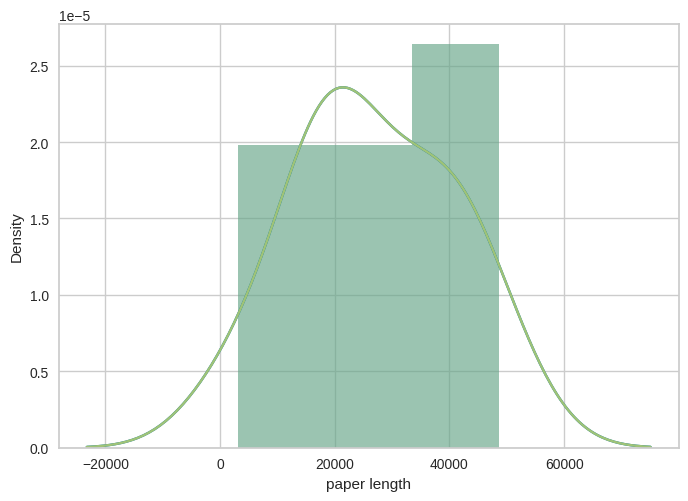

In [ ]:


# %%
# Define pretty class timer
# This is for execution time calculation

class Timer:
    def __init__(self):
        self.start_time = 0
        self.end_time = 0
        self.time_elapsed = 0

    def start(self, text = "Start running ..."):
        print("\n--------------------------------------\n" + text + datetime.now().strftime("%H:%M:%S"))
        self.start_time = time.time()

    def stop(self, text="End running ..."):
        self.end_time = time.time()
        self.time_elapsed = self.end_time - self.start_time
        print('Running time : %s for %s' % (time.strftime('%H:%M:%S', time.gmtime(self.time_elapsed)), text))
        print('--------------------------------------\n')
        self.start_time = 0
        self.end_time = 0

timer = Timer()




# %%
## 1 . Loading and cleaning the papers dataset


## CORD-19 dataset local paths
data_path = '.' #update_path
pdf_json_path = f'{data_path}/document_parses/pdf_json' #update_path
out_path = './output'


# %%
# Loading the CSV metadata file to a pandas dataframe

timer.start(text='Loading metatata ...')
df_metadata = pd.read_csv( f'{data_path}/drive/MyDrive/CORD19files/metadata.csv' , #update_path
    dtype={
        'doi': str,
        'pubmed_id': str,
        'mag_id': str,
        's2_id': str
    })

print("Metadata size : ", df_metadata.shape)
timer.stop(text='Loading metatata ...')

# %%
df_metadata.info()
df_metadata.head()


# %%
## Cleaning Metadata

# Drop rows with null 'sha' attribut
df_metadata = df_metadata[df_metadata['sha'].notna()]
# Drop rows with duplicate 'sha' attribut
df_metadata.drop_duplicates(subset=['sha'], inplace=True)

print("Metadata size : ", df_metadata.shape)


# %%
# Keep only papers with only one 'sha'
df_metadata["len_sha"] = df_metadata['sha'].apply(lambda x: len(x.split()))
df_metadata = df_metadata[df_metadata['len_sha'] == 1]

print("Metadata size : ", df_metadata.shape)

# %%
print("Papers with pdf_json    : ", df_metadata["pdf_json_files"].count())
print("Papers without pdf_json : " , df_metadata["pdf_json_files"].isna().sum())

# %%
# Get all paths to JSON files
pdf_json_paths = glob.glob(f'{data_path}/document_parses/pdf_json/*.json', recursive=True)
print("Number of pdf_json files in dataset : " , len(pdf_json_paths))

# %%
paths = set([f'{data_path}/document_parses/pdf_json/{sha}.json' for sha in df_metadata['sha'].values ])
pdf_json_paths = list(paths.intersection(set(pdf_json_paths)))
print("Number of pdf_json processable files in dataset : " , len(pdf_json_paths))


# %%
pdf_json_files = []
for files in df_metadata['pdf_json_files']:
    if not pd.isna(files) :
        pdf_json_files.extend([file.strip() for file in files.split(';')])
pdf_json_files = set(pdf_json_files)
print("Number of pdf_json files in metadata : " , len(pdf_json_files))



# %%

# pick a subset of the dataset (for debugging only)
# for a standard computer keep a small number of document (10000 for example)

n_sample = 10
from random import sample
pdf_json_paths = sample (pdf_json_paths, n_sample)
len(pdf_json_paths)


# %%
## Loading JSON files

# First we define a class Paper

class Paper:
    def __init__(self):
        self.cord_uid = ''
        self.sha = []
        self.title = ''
        self.authors = []
        self.abstract = ''
        self.body_text = ''
        self.doi = ''
        self.journal = ''
        self.publish_time = ''

        self.lang = ''
        self.cluster = 0

        self.body_length = 0
        self.abstract_length = 0
        self.body_words_count = 0
        self.abstract_words_count = 0

        self.processed_text = ''
        self.processed_abstract = ''

        self.vect = {}

    def __repr__(self):
        return f'{self.cord_uid} :\nTitle :\n{self.title}\nAbstract : \n{self.abstract[:200]}\nBody Text : \n{self.body_text[:200]}...'

# %%

# function for reading a JSON file into a Paper Object

def read_pdf_json_file (file_path):
    paper = Paper()
    try :
        with open(file_path) as file:
            content = json.load(file)

            paper.sha = content['paper_id'].strip()
            paper.title = content['metadata']['title'].strip().lower()

            # Extract authors
            for entry in content['metadata']['authors']:
                paper.authors.append(entry['first'].strip().lower() + '_' + entry['last'].strip().lower())

            # Extract Abstract
            abstract = []
            for entry in content['abstract']:
                abstract.append(entry['text'].strip().lower())
            paper.abstract = '\n'.join(abstract) # abstract as str

            # Extract body text
            body_text = []
            for entry in content['body_text']:
                body_text.append(entry['text'].strip().lower())
            paper.body_text = '\n'.join(body_text) # body_text as str
    except Exception as e:
        return None

    # get metadata information
    meta_data = df_metadata.loc[paper.sha == df_metadata['sha']]

    if len(meta_data) == 0:
        return None

    paper.cord_uid = meta_data['cord_uid'].values[0]
    paper.doi = meta_data['doi'].values[0]
    paper.journal = meta_data['journal'].values[0]
    paper.publish_time = meta_data['publish_time'].values[0]

    return paper

# %%

# Now let's read all JSON papers

timer.start('Reading json papers ... ')

with Pool(cores) as pool:
    papers = pool.map(read_pdf_json_file, pdf_json_paths)
papers = [paper for paper in papers if paper]

timer.stop('reading json papers')
print("Reading JSON files OK ... ")
print(len(papers), "papers.\n")


# %%
## Delete Unnecessary variables
del df_metadata
del paths
del pdf_json_files
del pdf_json_paths


# %%
## Counting characters and words in body text and abstract of each paper

timer.start('Words and chars counting ... ')
for paper in papers:
    paper.body_length = len(paper.body_text)
    paper.body_words_count = len(paper.body_text.split())

    paper.abstract_length = len(paper.abstract)
    paper.abstract_words_count = len(paper.abstract.split())
timer.stop('Words and chars counting ... ')


# %%

# Plot paper length distribution and save figure to output folder
print("number of papers before", len(papers))
sns_plot = sns.distplot([paper.body_length for paper in papers], axlabel="paper length")
sns_plot.figure.savefig(f'{out_path}/sns_fig1.png')

# %%

# Clean outliers
# Remove papers with body_length > 60000 chars or body_length < 1000 chars

for i in range(len(papers)-1, -1, -1) :
    if papers[i].body_length > 60000 or papers[i].body_length < 1000 :
        papers.pop(i)

print("Number of papers after: ", len(papers))

# Plot and save the new distribution
sns_plot = sns.distplot([paper.body_length for paper in papers])
sns_plot.figure.savefig(f'{out_path}/sns_fig2.png')




In [ ]:
for paper in papers :
    print(paper.processed_text)

['life', 'expectancy', 'increased', 'globally', 'past', 'centuries', 'years', 'decades', 'years', '.', 'recent', 'phenomenon', 'emerged', 'consequence', 'improvements', 'nutrition', 'hygiene', 'antimicrobial', 'therapy', 'vaccinations', '.', 'development', 'antiviral', 'therapy', 'lagged', '.', 'elderly', 'respiratory', 'viral', 'infections', 'cause', 'significant', 'morbidity', 'mortality', 'nonpneumonic', 'lower', 'respiratory', 'illnesses', 'linked', 'respiratory', 'viral', 'infection', 'usa', 'estimated', 'annual', 'deaths', 'attributed', 'influenza', 'respiratory', 'syncytial', 'viruses', 'rsv', '.', 'milestone', 'diagnostics', 'respiratory', 'viral', 'infections', 'discovery', 'influenza', 'virus', '.', 'discovery', 'coronaviruses', 'new', 'respiratory', 'viruses', 'significant', 'virus', 'strains', 'identified', 'years', '.', 'development', 'polymerase', 'chain', 'reaction', 'pcr', 'techniques', '1990s', 'initiated', 'new', 'wave', 'viral', 'diagnostics', '.', 'avian', 'flu', 'e

New custom stop words :
['i.e.', 'e.g.', 'etc', 'inc.', 'fig', 'fig.', 'tab.', 'ii', 'iii', 'iv', 'vi', 'vii', 'viii', 'iix', 'ix', 'doi', 'preprint', 'copyright', 'org', 'https', 'et', 'al', 'al.', 'author', 'figure', 'table', 'peer', 'reviewed', 'http', 'www', 'rights', 'reserved', 'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'elsevier', 'pmc', 'czi', '-pron-', 'usually', 'us$']

--------------------------------------
NLP Processing ... 18:52:13


/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)



Languages : 
 Counter({'en': 9})
Running time : 00:00:12 for NLP Processing ... 
--------------------------------------

Number of papers :  9
Max number of words :  4319
Max number of words :  305

--------------------------------------
Remove words with special chars ... 18:52:25
Running time : 00:00:00 for Remove words with special chars ... 
--------------------------------------

Max number of words :  3545
Mix number of words :  269
number of papers after rmv special words 9
Number of papers :  9
number of papers after rmv less than 100 9


<ipython-input-15-920c080b96e1>:143: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot([len(doc) for doc in docs], axlabel="doc length in words")


Number of papers :  9
number of papers after rmv more than 4000 9


<ipython-input-15-920c080b96e1>:163: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot([len(doc) for doc in docs], axlabel="doc length in words")


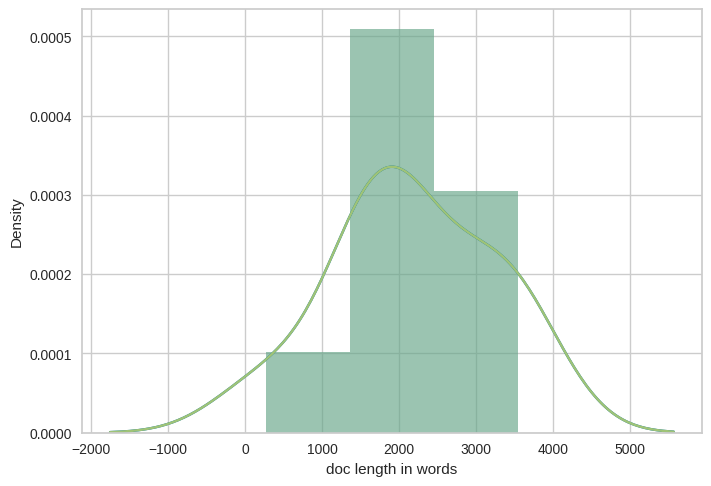

In [ ]:
# %%
# 2 . NLP Preprocessing using Spacy :
# Tokenization, Lemmatization, Language detection, and stopwords removal
#from spacy_langdetect import LanguageDetector
#from spacy.language import Language
nlp = spacy.load("en_core_sci_lg", disable=["tagger", "ner"])
#@Language.factory('language_detector')
#def language_detector(nlp, name):
#    return LanguageDetector()
#nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)
nlp.add_pipe('language_detector')
nlp.max_length = 1000000   # must be the max of len(text)


# New list of custom stop words defined in a text file
custom_stop_words = []
with open (f'./custom_stop_words.txt') as f :
    custom_stop_words = [w.strip() for w in f.readlines()]
print("New custom stop words :")
print(custom_stop_words)

# Mark them as stop words
for w in custom_stop_words:
    nlp.vocab[w].is_stop = True
'''
# Mark also NLTK stopwords
nltk_stopwords = nltk.corpus.stopwords.words('english')
for w in nltk_stopwords:
    nlp.vocab[w].is_stop = True

print(nltk_stopwords)
'''
# Define the tokenizer
def spacy_tokenizer(text):
    doc = nlp(text)
    if doc._.language['language'] == 'en' :
        return [word.lemma_ for word in doc if not (word.like_num or word.is_stop or word.is_space)]
    else :
        return [doc._.language['language']]
#or word.is_punct  or len(word)==1  if not (word.like_num or word.is_stop or word.is_space)
# %%
## Papers preprocessing

texts = []
for paper in papers :
    texts.append(paper.body_text)


timer.start(text='NLP Processing ... ')

with Pool(cores) as pool:
    processed_texts = pool.map(spacy_tokenizer, texts)

langs = []
for i in range (len(papers)):
    if len(processed_texts[i]) == 1 :
        papers[i].lang = processed_texts[i][0]
    else :
        papers[i].processed_text = processed_texts[i]
        papers[i].lang = 'en'
    langs.append(papers[i].lang)

counter = collections.Counter(langs)
print("\nLanguages : \n", counter)

del processed_texts
del texts
del langs

timer.stop(text='NLP Processing ... ')


# %%
# drop papers that are not english
for i in range(len(papers)-1, -1, -1):
    if papers[i].lang != 'en' : papers.pop(i)

print("Number of papers : ", len(papers))


# %%

# function that checks if a word contains any special character

def check_special_chars (word) :
    p = re.compile( '[@#$&%*:<>+=`"\|\[\]_!?~∼),;(}{\\\'"−]' )
    if p.search(word) == None : return True
    else : return False

def remove_special_chars_doc (doc) :
    return [word for word in doc if check_special_chars(word) ]

# %%

# Remove words with special chars

docs = []
for paper in papers :
    docs.append(paper.processed_text)

f = []
for doc in docs :
    f.append(len(doc))
print("Max number of words : ", max(f))
print("Max number of words : ", min(f))


timer.start('Remove words with special chars ... ')

with Pool(cores) as pool:
    docs = pool.map(remove_special_chars_doc, docs)

timer.stop('Remove words with special chars ... ')

f = []
for doc in docs :
    f.append(len(doc))
print("Max number of words : ", max(f))
print("Mix number of words : ", min(f))

print("number of papers after rmv special words", len(docs))

#%%

# Remove papers that have less than 100 words

for i in range(len(docs)):
    papers[i].processed_text = docs[i]

for i in range(len(papers)-1, -1, -1):
    if len(papers[i].processed_text) < 100 : papers.pop(i)

print("Number of papers : ", len(papers))

docs = []
for paper in papers :
    docs.append(paper.processed_text)
print("number of papers after rmv less than 100", len(docs))

# %%
# Display and save doc length distribution

sns_plot = sns.distplot([len(doc) for doc in docs], axlabel="doc length in words")
sns_plot.figure.savefig(f'{out_path}/sns_fig3.png')


#%%

# Remove papers that have more than 4000 words

for i in range(len(papers)-1, -1, -1):
    if len(papers[i].processed_text) > 4000 : papers.pop(i)

print("Number of papers : ", len(papers))

docs = []
for paper in papers :
    docs.append(paper.processed_text)
print("number of papers after rmv more than 4000", len(docs))
# %%

# Display and save the new  distribution
sns_plot = sns.distplot([len(doc) for doc in docs], axlabel="doc length in words")
sns_plot.figure.savefig(f'{out_path}/sns_fig4.png')

In [ ]:
docs = []
text_file = open('cord19_text.txt',"w")
for paper in papers :
    docs.append(paper.processed_text)
    print(paper.processed_text)
    for t in paper.processed_text:
      if( '.' in t and t != '.'):
        print(t)
      else:
        n = text_file.write(str(t)+ ' ')
    n =text_file.write('.')

text_file.close()

['life', 'expectancy', 'increased', 'globally', 'past', 'centuries', 'years', 'decades', 'years', '.', 'recent', 'phenomenon', 'emerged', 'consequence', 'improvements', 'nutrition', 'hygiene', 'antimicrobial', 'therapy', 'vaccinations', '.', 'development', 'antiviral', 'therapy', 'lagged', '.', 'elderly', 'respiratory', 'viral', 'infections', 'cause', 'significant', 'morbidity', 'mortality', 'nonpneumonic', 'lower', 'respiratory', 'illnesses', 'linked', 'respiratory', 'viral', 'infection', 'usa', 'estimated', 'annual', 'deaths', 'attributed', 'influenza', 'respiratory', 'syncytial', 'viruses', 'rsv', '.', 'milestone', 'diagnostics', 'respiratory', 'viral', 'infections', 'discovery', 'influenza', 'virus', '.', 'discovery', 'coronaviruses', 'new', 'respiratory', 'viruses', 'significant', 'virus', 'strains', 'identified', 'years', '.', 'development', 'polymerase', 'chain', 'reaction', 'pcr', 'techniques', '1990s', 'initiated', 'new', 'wave', 'viral', 'diagnostics', '.', 'avian', 'flu', 'e